In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap

In [6]:

global_terrorist = pd.read_csv('datasets\\Global_terrorist.csv', encoding='ISO-8859-1')


In [16]:
global_terrorist

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [17]:
filter1 = global_terrorist[['iyear', 'country_txt', 'region_txt', 'attacktype1_txt',
                   'nkill', 'nwound', 'latitude', 'longitude', 'city']]

In [18]:
filter2 = filter1[filter1['region_txt'] == 'Southeast Asia']

In [19]:
filter4 = filter2.dropna(subset=['latitude', 'longitude'])

<h1> 1. Which Asian countries have experienced the highest number of terror attacks?</h1>

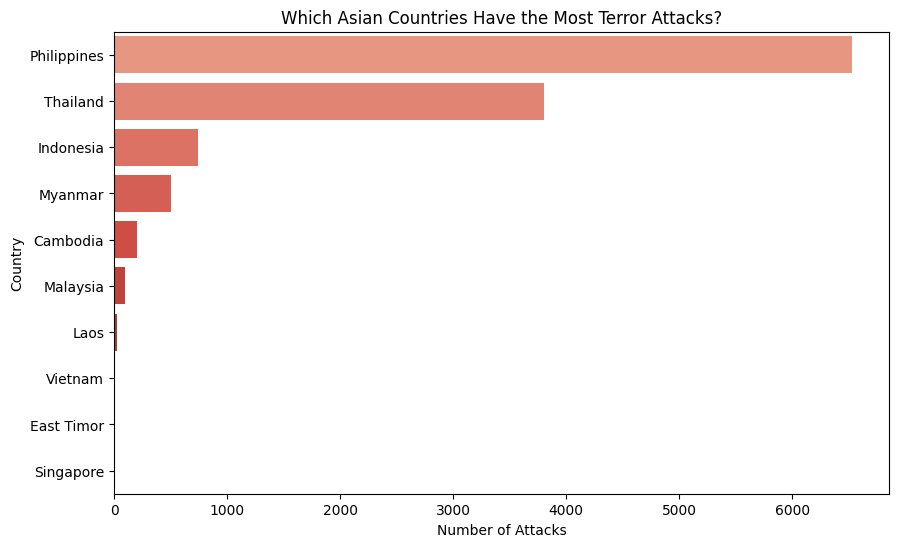

In [21]:
top_asian_countries = filter4['country_txt'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_asian_countries.values, y=top_asian_countries.index, palette="Reds_d")
plt.title("Which Asian Countries Have the Most Terror Attacks?")
plt.xlabel("Number of Attacks")
plt.ylabel("Country")
plt.show()


<h1> 2. What are the most common types of terrorist attacks in Asia?</h1>

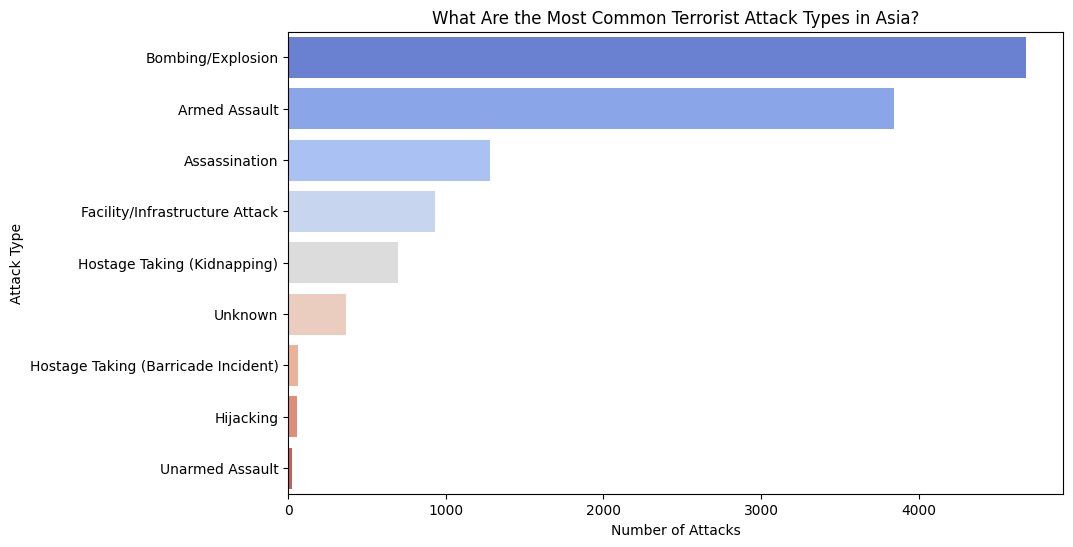

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=filter4, y='attacktype1_txt', 
              order=filter4['attacktype1_txt'].value_counts().index[:10], palette="coolwarm")
plt.title("What Are the Most Common Terrorist Attack Types in Asia?")
plt.xlabel("Number of Attacks")
plt.ylabel("Attack Type")
plt.show()


<h1>3. How has the number of terror attacks in Asia changed over time?</h1>

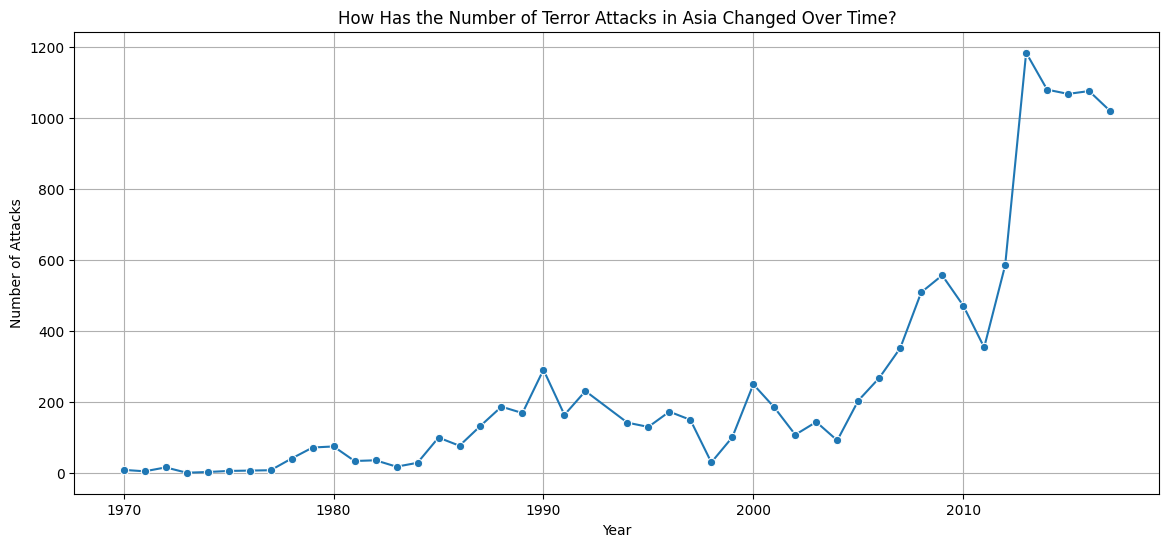

In [23]:
plt.figure(figsize=(14,6))
sns.lineplot(data=filter4.groupby('iyear').size(), marker='o')
plt.title("How Has the Number of Terror Attacks in Asia Changed Over Time?")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.show()


<h1>4. Where are the Terror Attacks in Asia Most Concentrated?</h1>

In [26]:
heat_data = filter4[['latitude', 'longitude']].values.tolist()
asia_map = folium.Map(location=[25, 90], zoom_start=3, tiles='CartoDB dark_matter')
HeatMap(heat_data, radius=8, blur=10).add_to(asia_map)
asia_map.save("asia_terror_heatmap.html")


In [27]:
asia_map

<h1>5. Which Asian countries have the lowest death toll from terrorism (total number killed)?</h1>

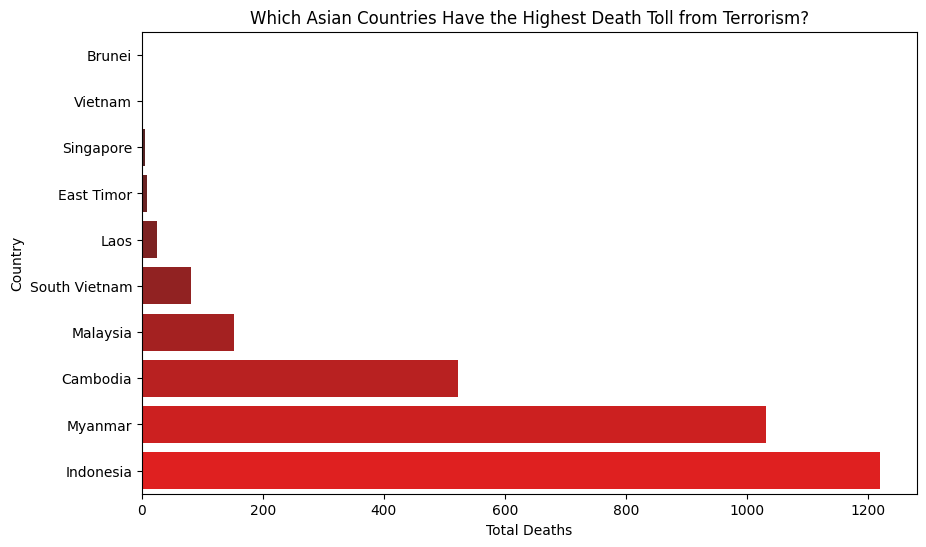

In [29]:
top_kills_asia = filter4.groupby('country_txt')['nkill'].sum().sort_values(ascending=True).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_kills_asia.values, y=top_kills_asia.index, palette="dark:red")
plt.title("Which Asian Countries Have the Highest Death Toll from Terrorism?")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.show()


<h1> 6. What are the deadliest years in Asia in terms of total fatalities from terrorism?</h1>

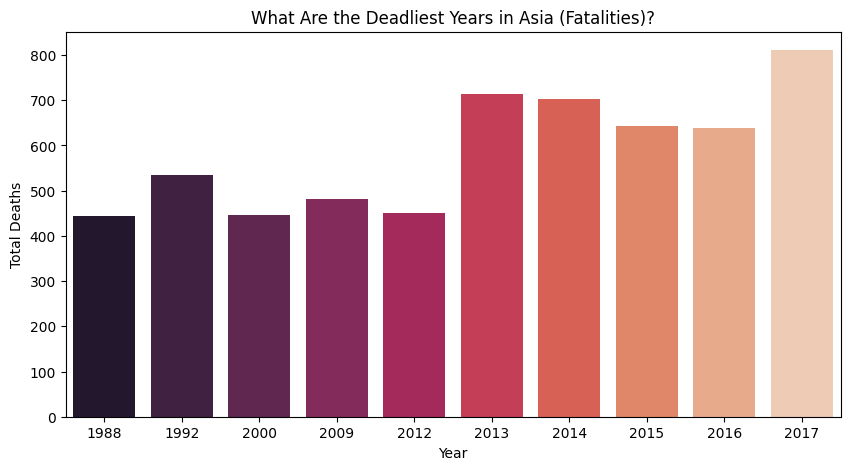

In [30]:
deadliest_years_asia = filter4.groupby('iyear')['nkill'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=deadliest_years_asia.index, y=deadliest_years_asia.values, palette="rocket")
plt.title("What Are the Deadliest Years in Asia (Fatalities)?")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.show()
